1. Realizar un analisis exploratorio de los datos para identificar relaciones entre variables, valores atipicos, tendencias, etc.

In [1]:
# Cargar las librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Lectura de datos en Python y se carga en la variable datos

data = pd.read_csv('.\winequality-red.csv')

#Realizamos lectura de datos para el analisis exploratorio

data.head()

,acidez_fija,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,PH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
#Descripción de los datos

data.describe()

,acidez_fija,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,PH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [5]:
#Identificacion de datos faltantes

data.isna().sum()

acidez_fija                0
acidez_volátil             0
ácido_cítrico              0
azúcar_residual            0
cloruros                   0
dióxido_de_azufre_libre    0
dióxido_de_azufre_total    0
densidad                   0
PH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64

3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

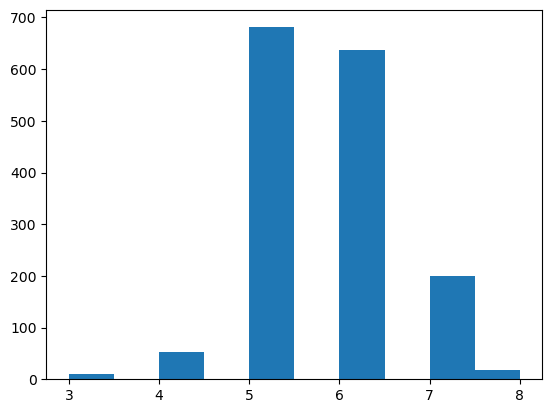

In [6]:
#Generamos un histograma

plt.hist(data.calidad)

<Axes: xlabel='dióxido_de_azufre_libre', ylabel='dióxido_de_azufre_total'>

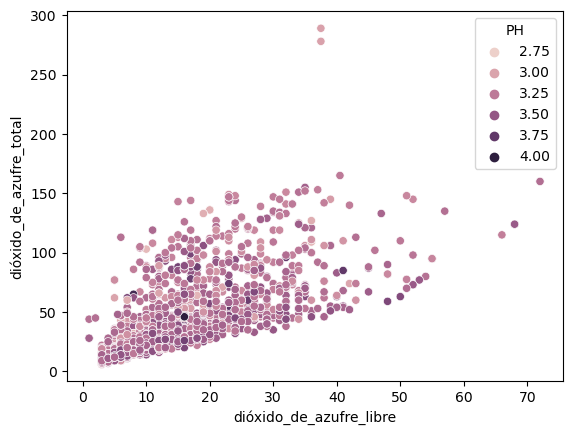

In [7]:
#Generamos un diagrama de dispersion

sns.scatterplot(x="dióxido_de_azufre_libre", y = "dióxido_de_azufre_total", hue = "PH", data =data)

In [8]:
#Dividimos el dataset

predictors_col = ["acidez_fija","acidez_volátil","ácido_cítrico","azúcar_residual","cloruros","dióxido_de_azufre_libre","dióxido_de_azufre_total","densidad","PH","sulfatos","alcohol"]
target_col = ['calidad']

In [9]:
#creamos las variables

predictors = data[predictors_col]
target = data[target_col]

In [10]:
#Visualizamos los datos de la variable predictors

predictors

,acidez_fija,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,PH,sulfatos,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
#Visualizamos los datos de la variable target

target

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [12]:
#Hallamos la correlación entre las variables predictors y target

corr = predictors.corr()
corr

,acidez_fija,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,PH,sulfatos,alcohol
acidez_fija,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
acidez_volátil,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
ácido_cítrico,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
azúcar_residual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
cloruros,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
dióxido_de_azufre_libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
dióxido_de_azufre_total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
densidad,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulfatos,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


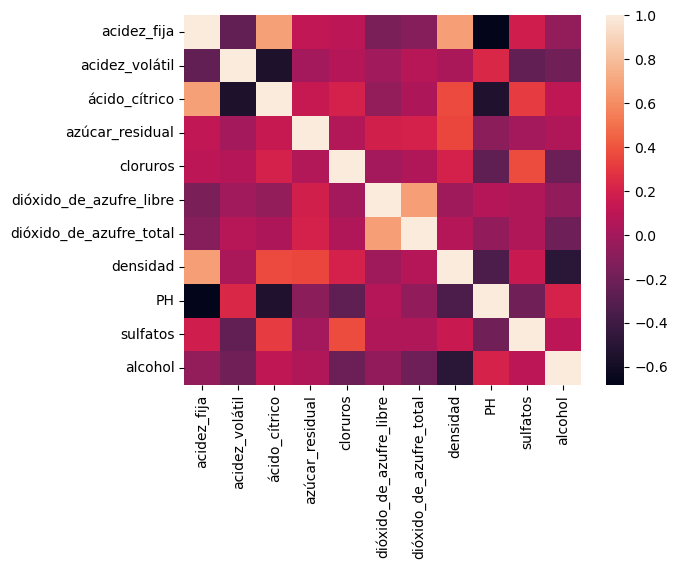

In [13]:
#Elaboramos el mapa de calor de la correlación

sns.heatmap(corr)
plt.show()

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [14]:
#Porcentaje de datos para entrenamiento (train) = 90%, y para prueba (test) = 10%

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.1, random_state=13)

In [15]:
#Creamos el árbol de decisión

tree = DecisionTreeClassifier()

5. Entrenar el modelo configurando los diferentes hiperparámetros

In [16]:
#Entrenamos el modelo

arbol = tree.fit(x_train, y_train)

[Text(0.5180652112845915, 0.9772727272727273, 'x[10] <= 10.525\ngini = 0.641\nsamples = 1439\nvalue = [9, 50, 613, 577, 177, 13]'),
 Text(0.3465090832078313, 0.9318181818181818, 'x[6] <= 83.5\ngini = 0.541\nsamples = 878\nvalue = [6, 32, 516, 292, 32, 0]'),
 Text(0.1764519013554217, 0.8863636363636364, 'x[9] <= 0.575\ngini = 0.576\nsamples = 697\nvalue = [6, 29, 365, 266, 31, 0]'),
 Text(0.07868975903614457, 0.8409090909090909, 'x[10] <= 9.75\ngini = 0.49\nsamples = 258\nvalue = [3, 20, 174, 57, 4, 0]'),
 Text(0.03576807228915663, 0.7954545454545454, 'x[10] <= 9.075\ngini = 0.371\nsamples = 158\nvalue = [1, 13, 123, 20, 1, 0]'),
 Text(0.01430722891566265, 0.75, 'x[8] <= 3.345\ngini = 0.642\nsamples = 9\nvalue = [0, 3, 2, 4, 0, 0]'),
 Text(0.008283132530120483, 0.7045454545454546, 'x[0] <= 13.25\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.005271084337349397, 0.6590909090909091, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.011295180722891566, 0.659

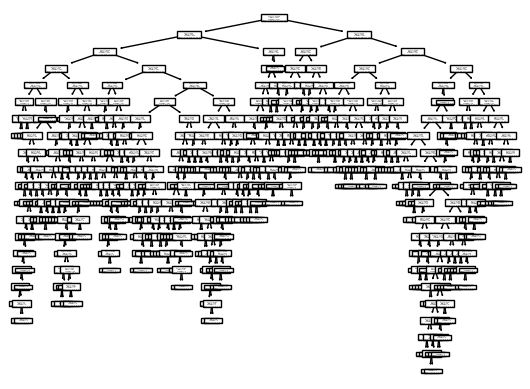

In [17]:
#Visualizamos el arbol de decision creado y entrenado

plot_tree(arbol)

In [18]:
#Crea el modelo de predicción

predicciones = arbol.predict(x_test)

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-Score, etc

In [19]:
#Visualizamos las prediciones realizadas por el modelo

predicciones

array([7, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 7, 6, 5, 5, 6, 5, 6,
       6, 5, 7, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6,
       5, 4, 6, 7, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       7, 6, 5, 6, 4, 7, 7, 6, 5, 5, 6, 5, 7, 7, 6, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 4, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 6, 6, 5, 5, 6, 7, 4, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 4, 6, 5], dtype=int64)

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [20]:
#Examinamos la matriz de confusion

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7
Actual,,,,
3,0,0,1,0
4,2,1,0,0
5,1,51,12,4
6,1,18,39,3
7,1,1,8,12
8,0,0,3,2


In [21]:
#Generamos el accuracy del modelo

accuracy = accuracy_score(y_test,predicciones)
accuracy

0.65